In [3]:
from google.colab import files
uploaded = files.upload()


Saving data_science_jobs_indeed_usa.csv to data_science_jobs_indeed_usa.csv


In [4]:
import pandas as pd

# قراءة الملف
df = pd.read_csv('data_science_jobs_indeed_usa.csv')

# عرض أول 5 صفوف للتأكد
df.head()


,Unnamed: 0,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...
1,1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...
2,2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...
3,3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...
4,4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...


In [5]:
# إنشاء عمود يحدد نوع الراتب
df['SalaryType'] = df['Salary'].apply(
    lambda x: 'hour' if pd.notna(x) and 'hour' in x.lower()
    else 'year' if pd.notna(x) and 'year' in x.lower()
    else 'unknown'
)


In [6]:
# عدد الوظائف حسب نوع الراتب
df['SalaryType'].value_counts()


,count
SalaryType,
unknown,628
year,363
hour,209


In [7]:
import re

def extract_salary_range(salary_str):
    if pd.isna(salary_str):
        return (None, None)

    # استخراج الأرقام (مع أو بدون فواصل)
    salary_numbers = re.findall(r'\$[\d,]+', salary_str)
    salary_values = [int(s.replace('$', '').replace(',', '')) for s in salary_numbers]

    if len(salary_values) == 2:
        return salary_values[0], salary_values[1]
    elif len(salary_values) == 1:
        return salary_values[0], salary_values[0]
    else:
        return (None, None)


In [8]:
#نطبقه عالبيانات
df[['MinSalary', 'MaxSalary']] = df['Salary'].apply(extract_salary_range).apply(pd.Series)


In [11]:
# حساب متوسط الراتب
df['AvgSalary'] = df[['MinSalary', 'MaxSalary']].mean(axis=1)


In [12]:
# تحويل الراتب بالساعة إلى سنوي (نفترض 40 ساعة × 52 أسبوع = 2080 ساعة)
df.loc[df['SalaryType'] == 'hour', 'AvgSalary'] *= 2080


In [15]:
#Check
df[['Salary', 'SalaryType', 'MinSalary', 'MaxSalary', 'AvgSalary']].head(10)


,Salary,SalaryType,MinSalary,MaxSalary,AvgSalary
0,NaN,unknown,NaN,NaN,NaN
1,$80 - $120 an hour,hour,80.0,120.0,208000.0
2,NaN,unknown,NaN,NaN,NaN
3,"$90,000 - $110,000 a year",year,90000.0,110000.0,100000.0
4,"$50,000 - $70,000 a year",year,50000.0,70000.0,60000.0
5,NaN,unknown,NaN,NaN,NaN
6,NaN,unknown,NaN,NaN,NaN
7,NaN,unknown,NaN,NaN,NaN
8,$75 - $90 an hour,hour,75.0,90.0,171600.0
9,NaN,unknown,NaN,NaN,NaN


In [16]:
# عرض أكثر المسميات الوظيفية تكرارًا
top_jobs = df['Title'].value_counts().head(10)
top_jobs


,count
Title,
Data Engineer,93
Business Analyst,75
Machine Learning Engineer,66
Data Scientist,59
Business Intelligence Developer,46
Database Administrator,45
Data Science Manager,20
Director of Data Science,13
Product Manager with (AI and ML),10


/tmp/ipython-input-2255521860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='Blues_d')


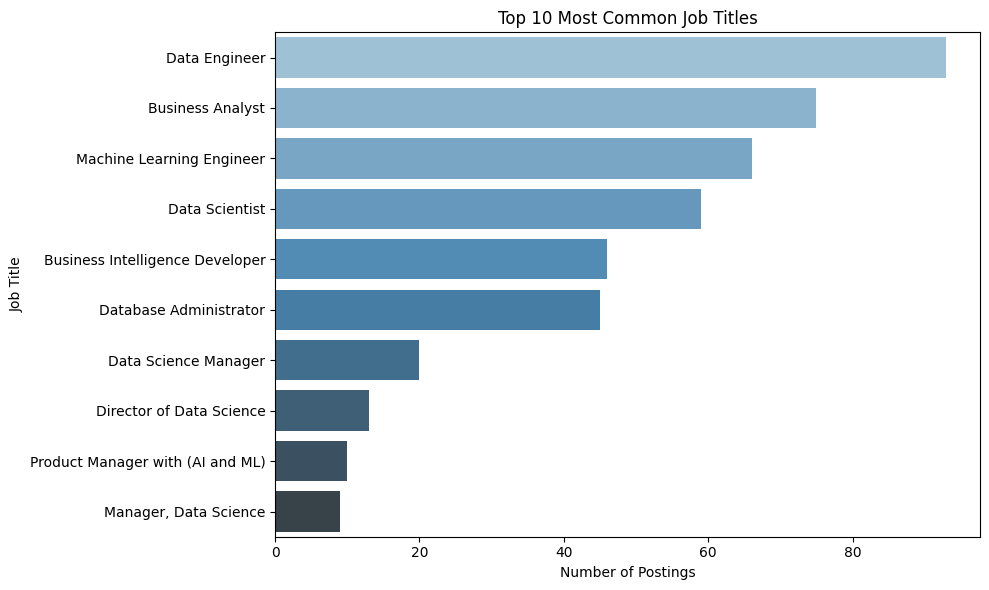

In [18]:

#رسم بياني للمسميات الوظيفية الأكثر شيوعًا
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='Blues_d')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4173317284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='Greens_d')


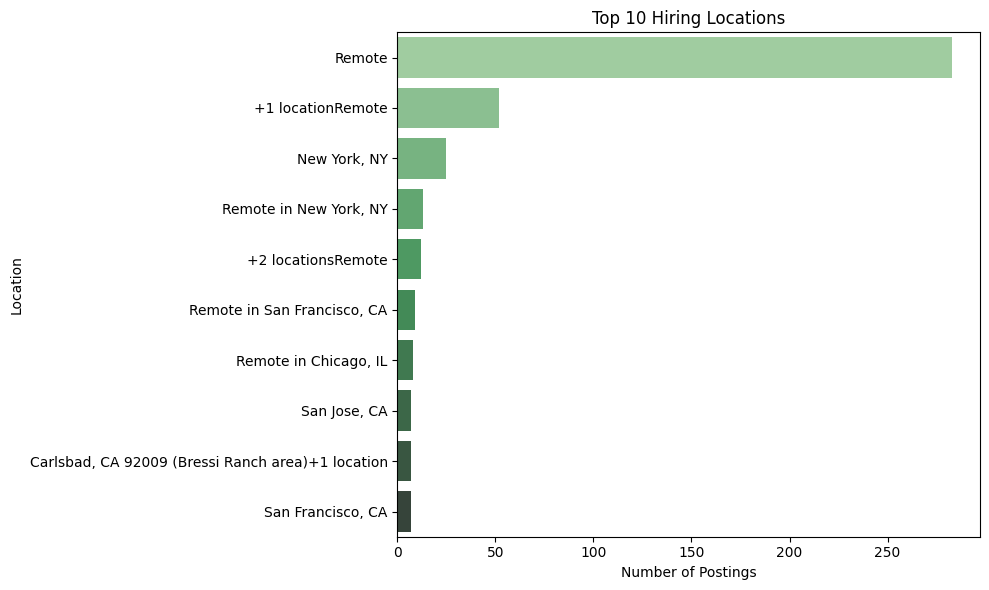

In [19]:
# أكثر المواقع (مدن/ولايات) تكرارًا
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Greens_d')
plt.title('Top 10 Hiring Locations')
plt.xlabel('Number of Postings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1773053372.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, palette='viridis')


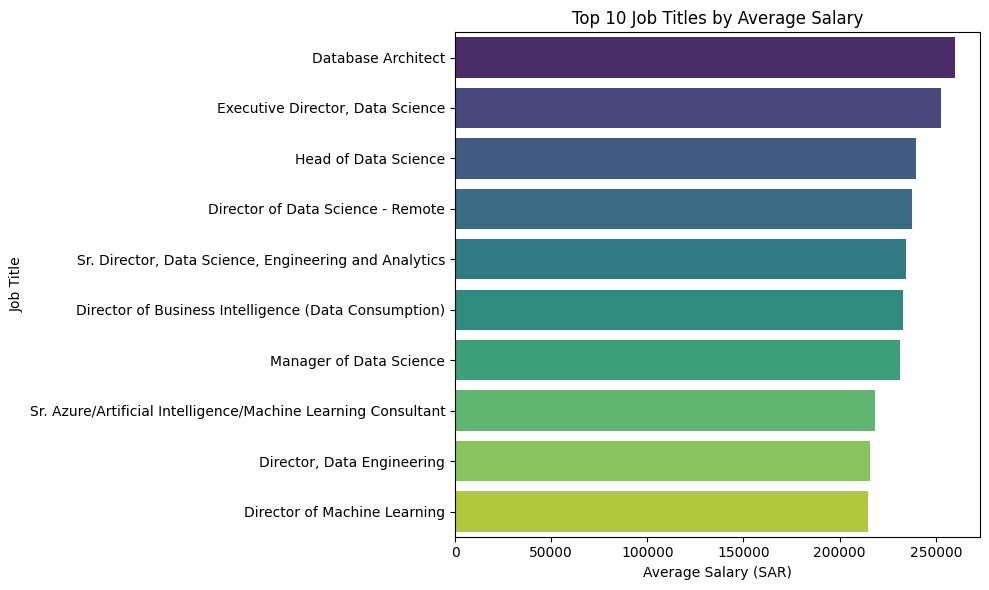

In [34]:
# حساب متوسط الراتب لكل مسمى وظيفي
avg_salary_by_title = df.groupby('Title')['AvgSalary'].mean().sort_values(ascending=False).head(10)

# رسم بياني
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, palette='viridis')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Average Salary (SAR)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1940331771.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='mako')


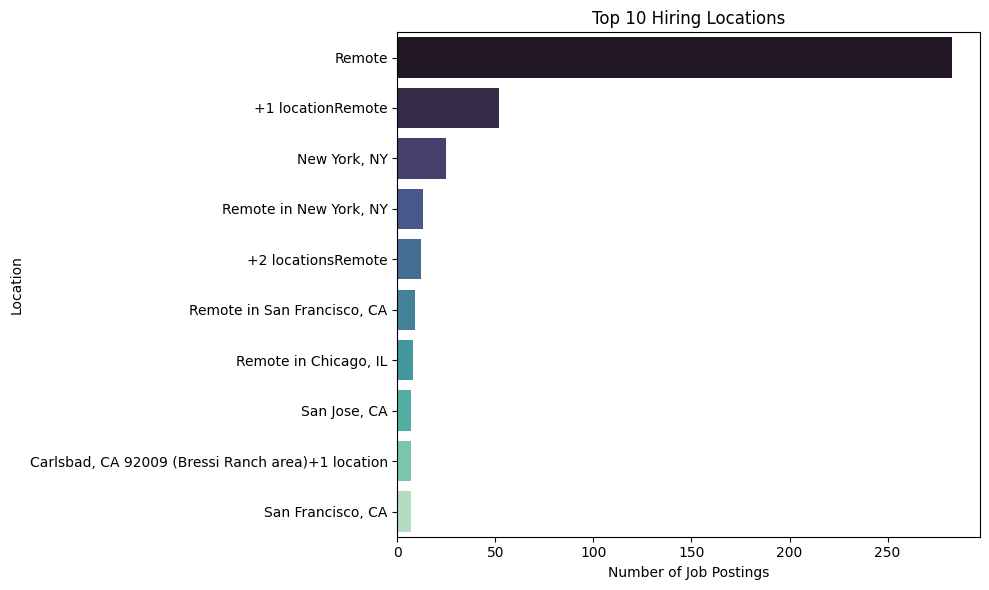

In [37]:
# أكثر المواقع تكرارًا (أعلى 10)
top_locations = df['Location'].value_counts().head(10)

# رسم بياني
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='mako')
plt.title('Top 10 Hiring Locations')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()
